In [1]:
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
col_names=['Pregnant','Glucose','BP','Skin','Insulin','BMI','Pedigree','Age','Label']
df = pd.read_csv(r'C:\Users\Rishabh\Documents\IMS Proschool Data Science\Logistic Regression\pima-indians-diabetes.csv',header=None,names=col_names)

In [3]:
df.head()

,Pregnant,Glucose,BP,Skin,Insulin,BMI,Pedigree,Age,Label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Aim: To predict the diabetes status of patients given their health measurements

In [4]:
df.tail()

,Pregnant,Glucose,BP,Skin,Insulin,BMI,Pedigree,Age,Label
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
# Define X & y
feature_cols = ['Pregnant','Insulin','BMI','Age']
X = df[feature_cols]
y = df.Label

In [7]:
# Splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [8]:
# Train a Logistic Regression model on training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
# Make the predictions for the testing set
y_pred = logreg.predict(X_test)

### Classification Accuracy: percentage of correct predictions

In [10]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred))

0.6770833333333334


### Null Accuracy: it is the accuracy that could be achieved by always predicting the most frequent class.

In [11]:
# Examine the class distribution of the testing set
y_test.value_counts()

0    130
1     62
Name: Label, dtype: int64

In [12]:
# Calculate the percentage of 1's
y_test.mean() 

0.3229166666666667

In [16]:
# Calculate the percentage of 0's
1 - y_test.mean()

0.6770833333333333

#### Since, the percentage of 0's are greater than the percentage of 1's in the testing set. Therefore, 67% is our 'Null accuracy'. Now, if we compare our 'Classification accuracy' with the 'Null accuracy', this shows that the model is'nt good.

In [19]:
# Code to calculate null accuracy in one line (for only binary classification problems )
max(y_test.mean(), 1-y_test.mean())

0.6770833333333333

### Conclusion for classification accuracy:-

####   1. It is the easiest classification metric to understand.
####   2. But, it does not tell you the underlying distribution of the response values.
####   3. And, it does not tell us what types of errors the classifier is making. 

## Confusion Matrix

In [23]:
# Print the matrix
print(metrics.confusion_matrix(y_test,y_pred))

[[114  16]
 [ 46  16]]


In [24]:
# Print the first 25 True & Predicted responses
print('True',y_test.values[0:25])
print('Pred', y_pred[0:25])

True [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [25]:
# Save the confusion matrix
confusion = metrics.confusion_matrix(y_test,y_pred)
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

### Metrics computed from Confusion Matrix

In [29]:
# Classification accuracy
print((TP+TN) / float(TP+TN+FP+FN))
print(metrics.accuracy_score(y_test,y_pred))

0.6770833333333334
0.6770833333333334


In [30]:
# Classification Error
print((FP+FN) / float(TP+TN+FP+FN))
print(1 - metrics.accuracy_score(y_test,y_pred))

0.3229166666666667
0.32291666666666663


In [31]:
# Sensitivity (True Positive rate or Recall)
print((TP) / float(TP+FN))
print(metrics.recall_score(y_test,y_pred))

0.25806451612903225
0.25806451612903225


In [33]:
# Specificity (this should always be greater and tells us that how specific the model is.)
print((TN) / float(TN+FP)) 

0.8769230769230769


In [34]:
# False Positive Rate (1-Specificity)
print((FP) / float(TN+FP))

0.12307692307692308


In [35]:
# Precision
print((TP) / float(TP+FP))
print(metrics.precision_score(y_test,y_pred))

0.5
0.5


In [39]:
# print the first 10 predicted responses
logreg.predict(X_test)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [40]:
# Print the first 10 predicted probabilities of class membership 0 & 1 (columns)
logreg.predict_proba(X_test)[0:10, :]

array([[0.61405867, 0.38594133],
       [0.7505398 , 0.2494602 ],
       [0.74167648, 0.25832352],
       [0.60291327, 0.39708673],
       [0.88426611, 0.11573389],
       [0.87695895, 0.12304105],
       [0.50819992, 0.49180008],
       [0.44582289, 0.55417711],
       [0.77950769, 0.22049231],
       [0.25853303, 0.74146697]])

In [41]:
# Print the first 10 predicted probabilities for class 1
logreg.predict_proba(X_test)[0:10,1]

array([0.38594133, 0.2494602 , 0.25832352, 0.39708673, 0.11573389,
       0.12304105, 0.49180008, 0.55417711, 0.22049231, 0.74146697])

In [42]:
# Store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:,1]

## ROC (Receiver Operating Characterstics) and AUC (Area Under Curve)

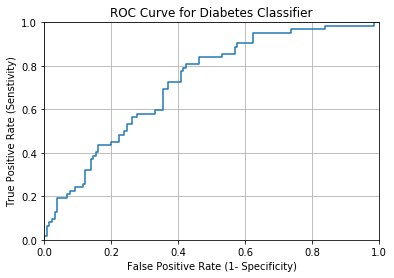

In [43]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred_prob)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC Curve for Diabetes Classifier')
plt.xlabel('False Positive Rate (1- Specificity)')
plt.ylabel('True Positive Rate (Senstivity)')
plt.grid(True)

In [44]:
# AUC is the percentage of the ROC plot that is underneath the curve
print(metrics.roc_auc_score(y_test,y_pred_prob))

0.7227047146401985


In [45]:
# Calculate the cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(logreg,X,y,cv=10,scoring='roc_auc').mean()

0.7425071225071225